In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Budget_-_2026_Budget_Recommendations_-_Revenue.csv")

In [4]:
df.head()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
0,0100,Corporate Fund,Intergovernmental Revenue,Municipal Auto Rental Tax,Municipal Auto Rental Tax,4894443
1,0100,Corporate Fund,Intergovernmental Revenue,Personal Property Replacement Tax,Personal Property Replacement Tax,202567148
2,0100,Corporate Fund,Intergovernmental Revenue,Reimbursements for City Services,Reimbursements for City Services,1143491
3,0100,Corporate Fund,Intergovernmental Revenue,State Income Tax,State Income Tax,545129731
4,0100,Corporate Fund,Local Non-Tax Revenue,"Licenses, Permits, and Certificates",Alcohol Dealers' License,17328661


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FUND_CODE           154 non-null    object
 1   FUND_NAME           154 non-null    object
 2   REVENUE_GROUP_TYPE  52 non-null     object
 3   REVENUE_CATEGORY    52 non-null     object
 4   REVENUE_SOURCE      154 non-null    object
 5   ESTIMATED_REVENUE   154 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.3+ KB


In [6]:
df.describe(include = "all")

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
count,154,154,52,52,154,1.540000e+02
unique,37,37,4,19,100,NaN
top,0100,Corporate Fund,Local Tax,Recreation Taxes,Interest,NaN
freq,52,52,24,9,8,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.313196e+07
std,NaN,NaN,NaN,NaN,NaN,2.281755e+08
min,NaN,NaN,NaN,NaN,NaN,9.800000e+03
25%,NaN,NaN,NaN,NaN,NaN,3.525925e+06
50%,NaN,NaN,NaN,NaN,NaN,1.447063e+07
75%,NaN,NaN,NaN,NaN,NaN,6.424702e+07


1. **FUND_CODE**
- As the count in fund code feature is 154 it has no missing values
- In this feature there are **37 unique values**
- **0100** is the most **frequenct fund code** which has been **repeated 52 times**

2. **FUND_NAME**
- As the count in fund name feature is 154 it has no missing values
- In this feature there are **37 unique values**
- **Corporate fund** is the most **frequent fund name** which has been **repeated 52 times**

3. **REVENUE_GROUP_TYPE**
- As the count in revenue group type is 52 it has some missing values
- In this feature there are **4 unique values**
- **Local Tax** is the most **frequent revenue group** type which has been **repeated 24 times**

4. **REVENUE_CATEGORY**
- As the count in category feature is 52 it has some missing values
- In this feature there are **19 unique values**
- **Recreation Taxes** is the most **frequent category** which has been **repeated 9 times**

5. **REVENUE_SOURCE**
- As the count in revenue source feature is 154 it has no missing values
- In this feature there are **100 unique values**
- **Interest** is the most **frequent source** which has been **repeated 8 times**

6. **ESTIMATED_REVENUE**
- As the count in estimated revenue feature is 1.540000e+02 it has no missing values
- The **mean average is 9.313196e+07** and the **standard deviation is 2.281755e+08** in this observation we see the data is less variated
- In this feature **9.800000e+03 is the min value** and **2.052774e+09 is the max value**
- In this feature **25%** of ESTIMATED_REVENUE lies **below 3.525925e+06**
- In this feature **50%** of ESTIMATED_REVENUE lies **below 1.447063e+07**
- In this feature **75%** of ESTIMATED_REVENUE lies **below 6.424702e+07**

In [7]:
df.dtypes

FUND_CODE             object
FUND_NAME             object
REVENUE_GROUP_TYPE    object
REVENUE_CATEGORY      object
REVENUE_SOURCE        object
ESTIMATED_REVENUE      int64
dtype: object

In [8]:
df.isna().sum()

FUND_CODE               0
FUND_NAME               0
REVENUE_GROUP_TYPE    102
REVENUE_CATEGORY      102
REVENUE_SOURCE          0
ESTIMATED_REVENUE       0
dtype: int64

In [9]:
df['REVENUE_GROUP_TYPE'] = df['REVENUE_GROUP_TYPE'].fillna(df['REVENUE_GROUP_TYPE'].mode()[0])

In [10]:
df['REVENUE_CATEGORY'] = df['REVENUE_CATEGORY'].fillna(df['REVENUE_CATEGORY'].mode()[0])

In [11]:
df.duplicated().sum()

0

In [12]:
import matplotlib.pyplot as plt

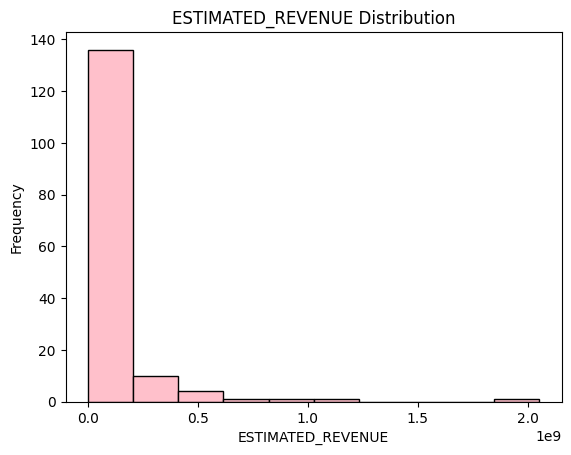

In [13]:
plt.hist(df['ESTIMATED_REVENUE'], color='pink', edgecolor='black')
plt.title('ESTIMATED_REVENUE Distribution')
plt.xlabel('ESTIMATED_REVENUE')
plt.ylabel('Frequency')
plt.show()


- Few have highest reveune amount
- Most of have the less revenue amount
- **It is right skewed distribution few values on right**

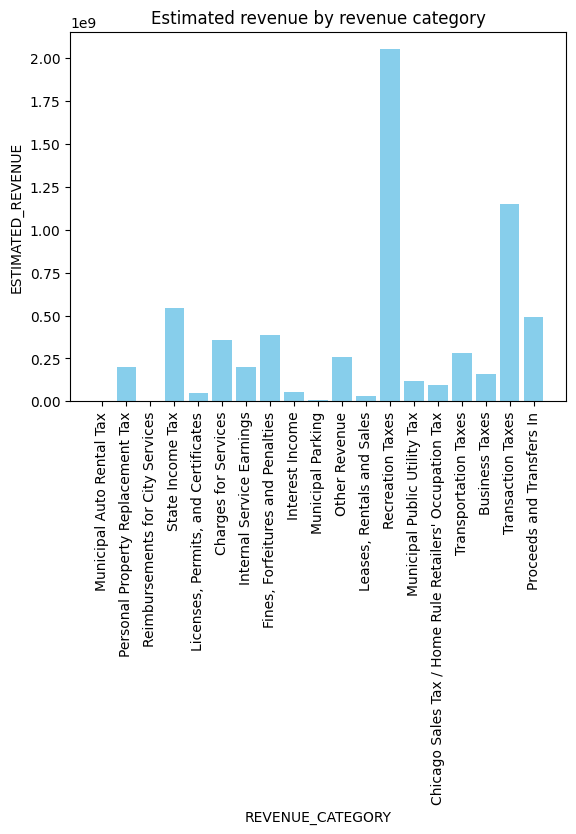

In [15]:
plt.bar(df['REVENUE_CATEGORY'],df['ESTIMATED_REVENUE'], color ="skyblue")
plt.title("Estimated revenue by revenue category")
plt.xlabel('REVENUE_CATEGORY')
plt.ylabel('ESTIMATED_REVENUE')
plt.xticks(rotation=90)
plt.show()

- Recereation taxes has the highest estimated revenue in around 2.00
- some categories have less revenue

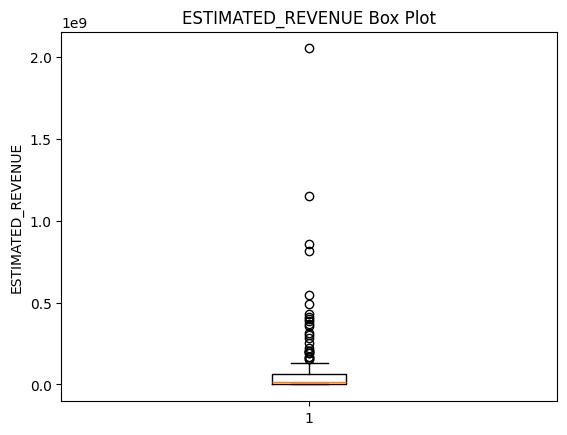

In [16]:
plt.boxplot(df['ESTIMATED_REVENUE'])

plt.title('ESTIMATED_REVENUE Box Plot')
plt.ylabel('ESTIMATED_REVENUE')
plt.show()

- **It is global outlier data points are far from other data points**

In [17]:
IQR = 6.424702 - 3.525925

lower_limit = 3.525925 - 1.5 * IQR
upper_limit = 6.424702 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

-0.8222405000000004
10.7728675


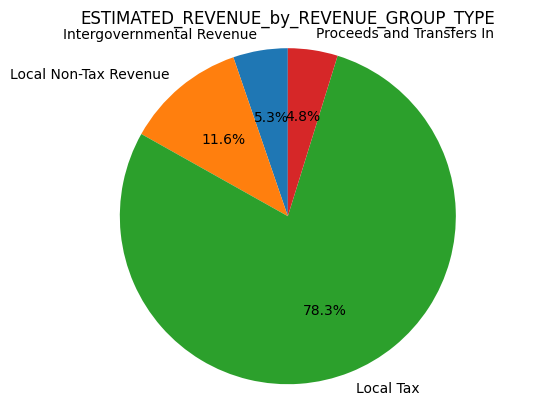

In [31]:
ESTIMATED_REVENUE_by_REVENUE_GROUP_TYPE = df.groupby('REVENUE_GROUP_TYPE')['ESTIMATED_REVENUE'].sum()

plt.pie(ESTIMATED_REVENUE_by_REVENUE_GROUP_TYPE, labels=ESTIMATED_REVENUE_by_REVENUE_GROUP_TYPE.index, autopct='%1.1f%%', startangle=90)

plt.title('ESTIMATED_REVENUE_by_REVENUE_GROUP_TYPE')
plt.axis('equal')  
plt.show()

- **Local tax** has the **highest estimated revenue** in revenue group type **around 78.3%**
- **Local Non-Tax** has the **lowest estimated revenue around 11.6%**
- **Intergovernmental revenue** and **Proceeds and Transfers In** has almost similar revenue **around 5.35 and 4.8%**

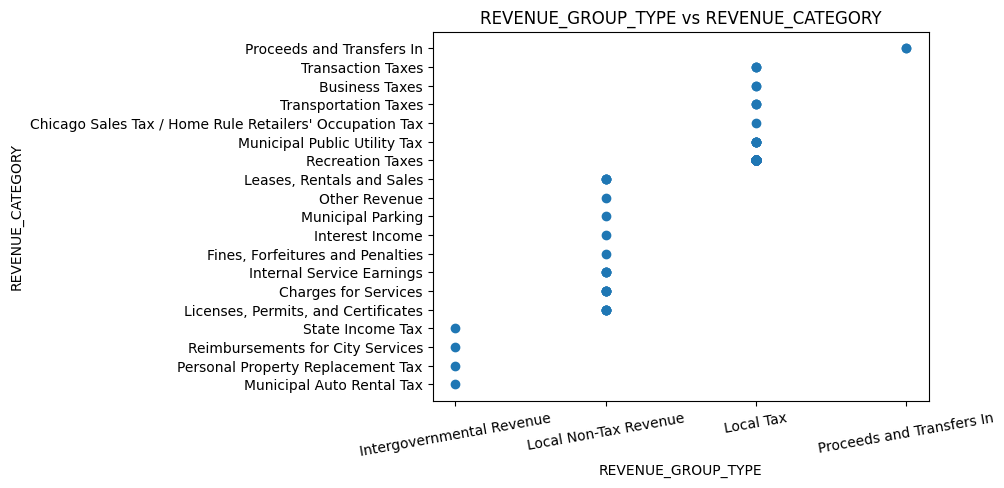

In [28]:
plt.scatter(df['REVENUE_GROUP_TYPE'], df['REVENUE_CATEGORY'])
plt.xlabel("REVENUE_GROUP_TYPE")
plt.ylabel("REVENUE_CATEGORY")
plt.title("REVENUE_GROUP_TYPE vs REVENUE_CATEGORY")
plt.xticks(rotation=10)
plt.show()

- **This shows relationship between revenue group type and revenue category**
- **Each group type have some types of categories**

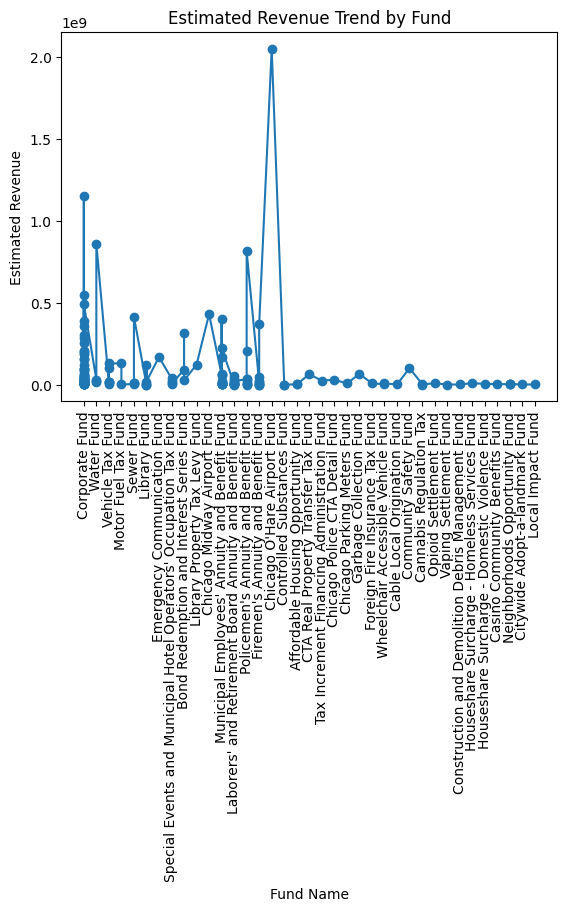

In [15]:
plt.plot(df['FUND_NAME'], df['ESTIMATED_REVENUE'], marker='o')
plt.xticks(rotation=90)
plt.xlabel("Fund Name")
plt.ylabel("Estimated Revenue")
plt.title("Estimated Revenue Trend by Fund")
plt.show()

- **Few funds have highest revenue around 2.0**
- **Many funds have lowest revenue below 0.3**